Saving players_21.csv to players_21 (2).csv
Linhas: 18944, Colunas: 106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB
Colunas com valores nulos (%):
 defending_marking       100.000000
loaned_from              95.998733
nation_jersey_number     94.050887
nation_position          94.050887
player_tags              92.567568
gk_kicking               89.004434
gk_diving                89.004434
gk_positioning           89.004434
gk_reflexes              89.004434
gk_handling              89.004434
gk_speed                 89.004434
player_traits            56.107475
dribbling                10.995566
defending                10.995566
physic                   10.995566
shooting                 10.995566
passing                  10.995566
pace                     10.995566
release_clause_eur        5.252323
joined                    5.188978
team_position   

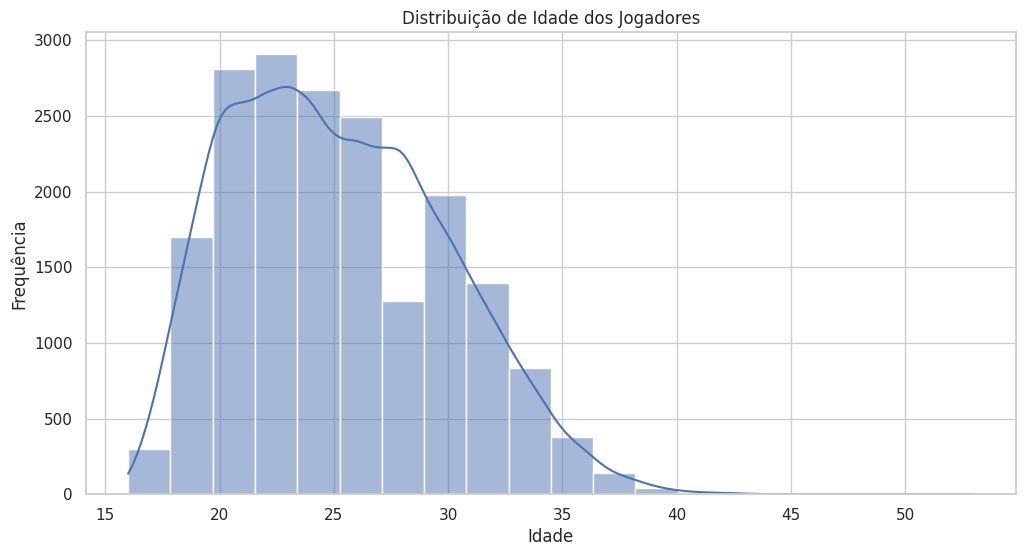

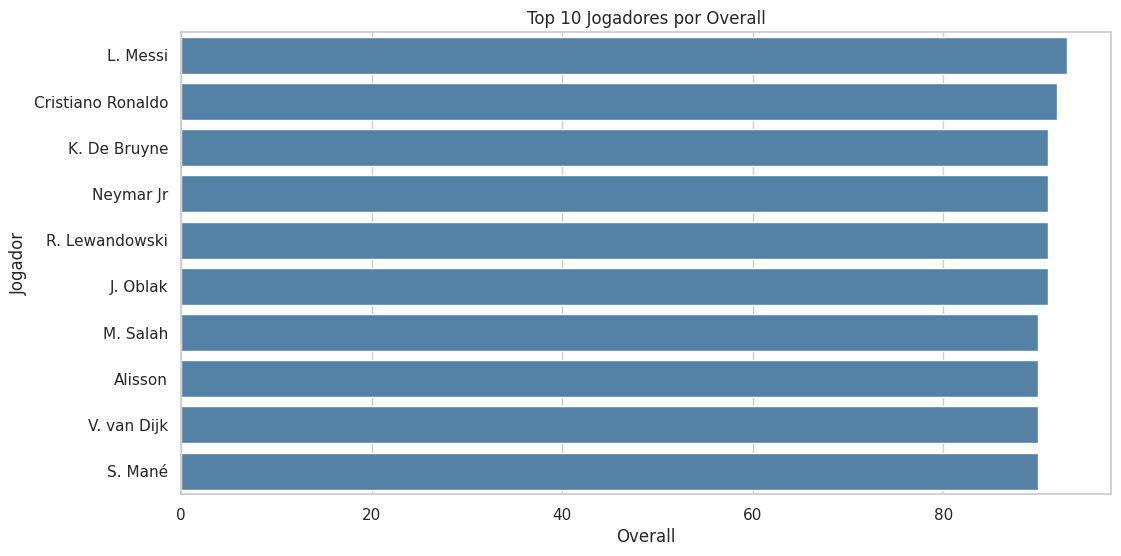

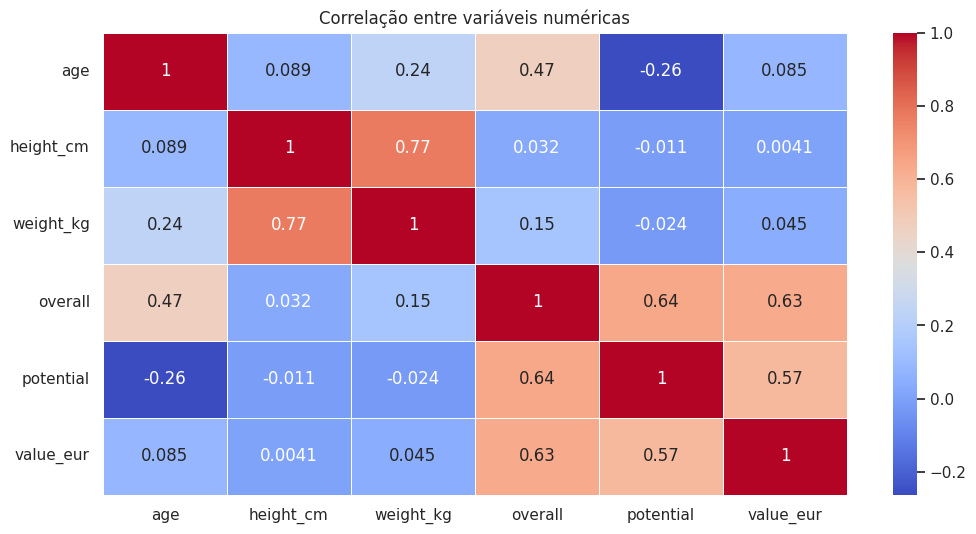

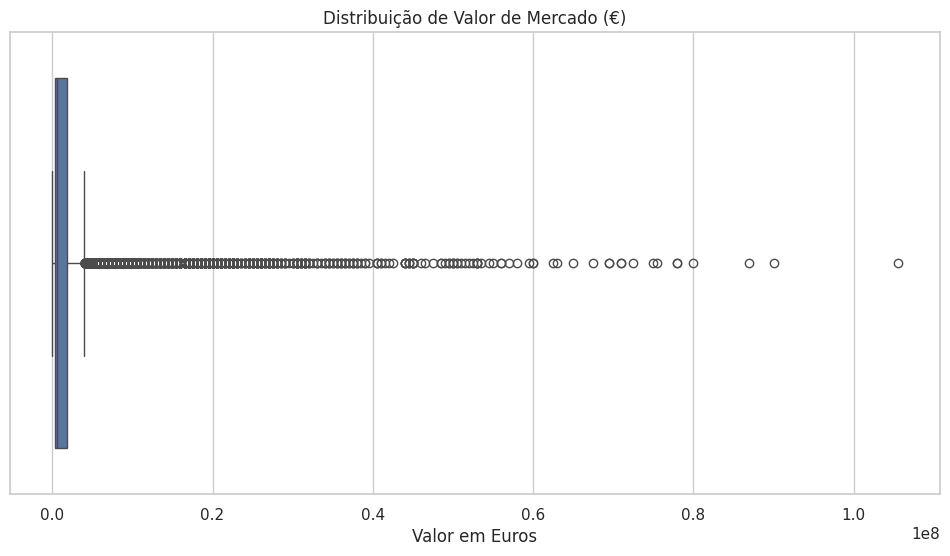

In [4]:
# Análise Exploratória - FIFA 21
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('players_21.csv')
df.head()

print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
df.info()

df.describe().T

missing = df.isnull().mean().sort_values(ascending=False) * 100
missing[missing > 0]

# Preenchimento de valores ausentes com média
df['height_cm'] = df['height_cm'].fillna(df['height_cm'].mean())
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())

# Gráfico: Distribuição de idade
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribuição de Idade dos Jogadores")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Gráfico: Top 10 jogadores por Overall
top_overall = df[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
sns.barplot(data=top_overall, y='short_name', x='overall', color='steelblue')
plt.title("Top 10 Jogadores por Overall")
plt.xlabel("Overall")
plt.ylabel("Jogador")
plt.show()

# Gráfico: Correlação entre variáveis numéricas
num_cols = ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlação entre variáveis numéricas")
plt.show()

# Gráfico: Boxplot do valor de mercado
sns.boxplot(x=df['value_eur'])
plt.title("Distribuição de Valor de Mercado (€)")
plt.xlabel("Valor em Euros")
plt.show()
